과제: 파이썬 딥러닝 텐서플로 ch3.4, 6~7 필사

마감: 5월 24일 금요일 18:30

87p~ 95p, 105p~115p 필사하여 링크를 올려주세요.

---------
# Part 03. 케라스 (Keras)


## 04 모델 세부 설정

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 코드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print("train set : ", x_train.shape, y_train.shape)
print("test set : ", x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()


train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


---------
### 4-1 초기값 설정

자주 사용되는 초기화 목록
- glorot_normal, glorot_uniform
- lecun_normal, lecun uniform
- he_normal, he_uniform
- 분포 초기화

In [2]:
dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal', activation = 'relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer = he_normal, activation = 'relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


----------
### 4-2 규제
- 모델의 과대적합을 해소하기 위해 L1, L2 규제 적용

In [4]:
# 기본값
dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer = 'l1', activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha = 0.1 변경
regularizer = tf.keras.regularizers.l1(l1 = 0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer = regularizer, activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


--------
### 4-3 드롭아웃
- 과대적합 문제 해결
- 임의의 노드의 일부만 연결함
-  가중치 파라미터의 개수가 줄어들어 과대적합을 방지

In [6]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

------------
### 4-4 배치 정규화
- 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화
- 데이터가 다음층으로 전달 되기 전에 스케일 조정
- 별도의 코드 대신 클래스 인스턴스를 생성해 추가

In [7]:
# Model A : Dense+Relu
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), 
    tf.keras.layers.Dense(64, activation = 'relu'), 
    tf.keras.layers.Dense(32, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Model B : Dense+BatchNorm+Relu
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10,activation='softmax')
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

- 배치 정규화만 추가했는데 손실이 이전 대비 안정적이고 빠르게 수렴
- 데이터 개수가 큰 데이터셋에는 성능에 영향을 더 많이 미침

-----------
### 4-5 활성화 함수

In [11]:
# Leaky Relu 기본 설정
tf.keras.layers.LeakyReLU()

# Leaky Relu, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [12]:
# Model C : Dense+BatchNorm_KeakyReLU(0.2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10,activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

총 3개의 모델을 동일한 조건으로 10번의 epoch동안 훈련한 후 수렴속도 확인

In [ ]:
model_a.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_b.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_c.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model A : Dense+ReLU
history_a=model_a.fit(x_train,y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

# Model B : Dense+BatchNorm+ReLU
history_b=model_b.fit(x_train,y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

# Model C : Dense+BatchNorm+LeakyReLU(0.2)
history_c=model_c.fit(x_train,y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2908 - accuracy: 0.9152 - val_loss: 0.1586 - val_accuracy: 0.9510
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1333 - accuracy: 0.9603 - val_loss: 0.1195 - val_accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0981 - accuracy: 0.9703 - val_loss: 0.1019 - val_accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0790 - accuracy: 0.9761 - val_loss: 0.0980 - val_accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0672 - accuracy: 0.9792 - val_loss: 0.1101 - val_accuracy: 0.9690
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0891 - val_accuracy: 0.9728
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0885 - val_accurac

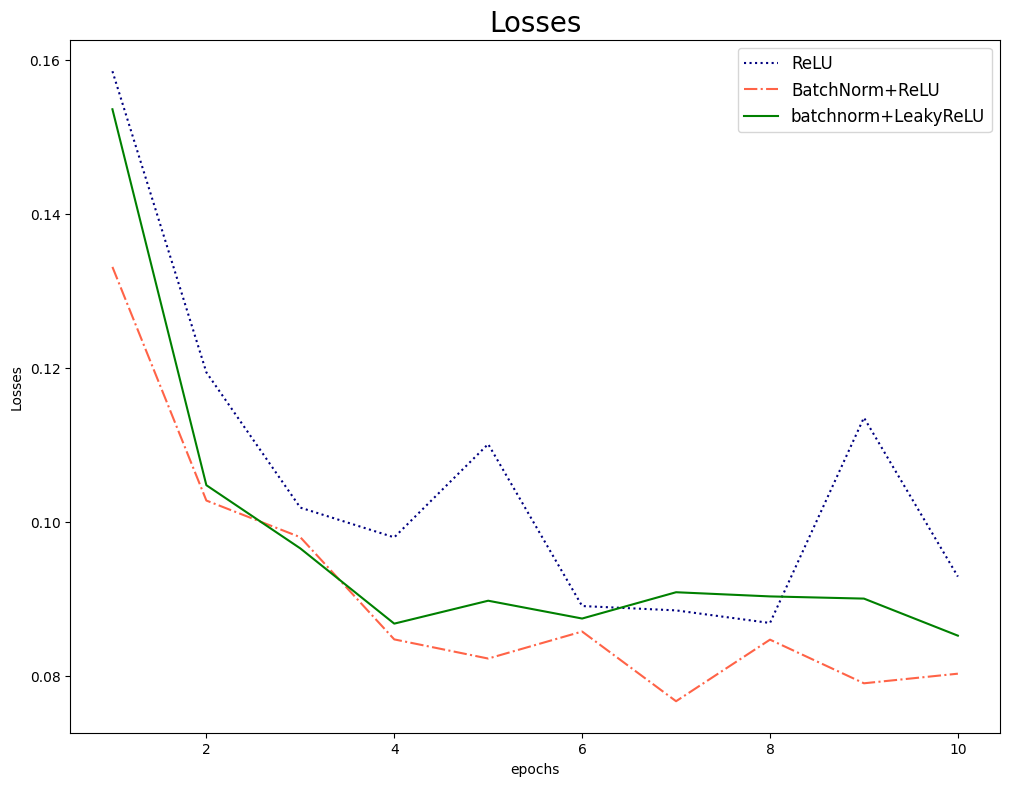

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11),history_a.history['val_loss'],color='navy',linestyle=':')
plt.plot(np.arange(1,11),history_b.history['val_loss'],color='tomato',linestyle='-.')
plt.plot(np.arange(1,11),history_c.history['val_loss'],color='green',linestyle='-')

plt.title('Losses',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU','BatchNorm+ReLU','batchnorm+LeakyReLU'],fontsize=12)

------
## 06. 모델 저장 및 불러오기

### 6-1. 모델을 파일로 저장

훈련을 종료하여 가중치가 업데이트 된 모델 인스턴스를 저장할 수 있다.
- save() 메소드 사용
- 모델 저장 형식은 'HDF5' 포맷과 'SavedModel' 포맷 두 가지가 있다.
- HDF5 : 대용량의 데이터를 저장하기 위한 파일 형식

In [ ]:
# 모델을 h5 포맷으로 저장
model_c.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


--------
### 6-2 저장된 모델 복원

tf.keras.models.load_model('포맷') 메소드로 저장된 모델을 복원할 수 있다.

In [14]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [ ]:
# 모델 검증
loss,acc=h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model]loss:{loss:.5f},acc:{acc:.5f}')

h5 model]loss:0.08525,acc:0.97450


In [16]:
# 모델을 SavedModel 포맷으로 저장
model_c.save('saved-model')

In [17]:
# 모델 복원
saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

.hd 확장자를 생략하면 SavedModel 포맷으로 저장된다. 복원 방식은 동일하다.

In [18]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose = 0)
print(f'h5 model]loss:{loss:.5f}, acc:{acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose = 0)
print(f'saved_ model]loss:{loss:.5f}, acc:{acc:.5f}')

h5 model]loss:0.08525,acc:0.97450
saved_ model]loss:0.08525,acc:0.97450


-------
## 07 복잡한 모델 생성

### 7-1 함수형 API

**다양한 모델구조**

- 함수의 입력 매개변수를 여러개 갖는 다중 입력
- 함수의 return 값을 여러개 갖는 다중 출력
-같은 레벨에 여러개의 층을 배치하여 입력과 출력을 공유하는 구조

In [19]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape = (28, 28), name = 'InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name = 'Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation = 'relu', name = 'Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation = 'relu', name = 'Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation = 'softmax', name = 'OutputLayer')(x3)

In [20]:
# 모델 생성
func_model = tf.keras.Model(inputs = input_layer, outputs = x4, name = 'FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


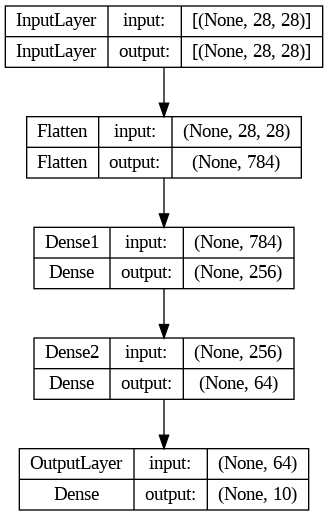

In [21]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [22]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss:{loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2208 - accuracy: 0.9342
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0891 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0617 - accuracy: 0.9807
Functional Model] loss:0.09397,acc:0.97100


------
### 7-2 모델 서브 클래싱

- 케라스에서 제공하는 model 클래스를 기반으로 딥러닝 모델을 구현

In [23]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [24]:
# 모델 생성
mymodel=MyModel()

# 모델의 이름 설정
mymodel._name='subclass_model'

# 모델의 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model]loss:{loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2146 - accuracy: 0.9354
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0885 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0601 - accuracy: 0.9804
Subclassing Model]loss:0.08401,acc:0.97400


------
### 7-3 서브클래싱 모델 파라미터를 활용한 생성

In [26]:
class MyModel(tf.keras.Model):

    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel,self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flat ten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [27]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

mymodel.fit(x_train, y_train, epochs=3)

loss,  acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f"Subclassing Model w.parameters] loss : {loss:.5f}.acc : {acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2122 - accuracy: 0.9369
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0869 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0577 - accuracy: 0.9817
Subclassing Model w.parameters]loss:0.07134.acc:0.97750
